In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix


# Data

In [2]:
datasetWine = pd.read_csv("./winequality-red.csv")
datasetWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Quality distribution
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64
Low quality [3-5]: 0.465291%
High quality [6-8]: 0.534709%


<AxesSubplot:>

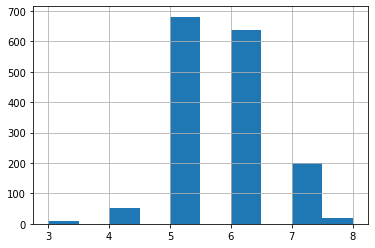

In [3]:
print('Quality distribution')
quality = datasetWine['quality'].value_counts()
print(quality)
print('Low quality [3-5]: {0:f}%'.format(sum([quality[i] for i in range(3,6)])/len(datasetWine)))
print('High quality [6-8]: {0:f}%'.format(sum([quality[i] for i in range(6,9)])/len(datasetWine)))
datasetWine['quality'].hist()

# Create labels
We make the labels. 0 if the quality is low and 1 if quality is high

In [4]:
Y = [int(datasetWine['quality'][i] >5) for i in range(len(datasetWine))]

# Visualization data features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


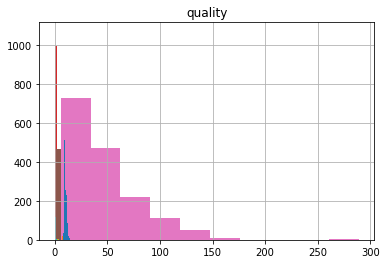

In [5]:
print(datasetWine.columns)
for feature in datasetWine.columns:
    
    datasetWine[feature].hist()
    plt.title(feature)
    #plt.show()

# Normalize data

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


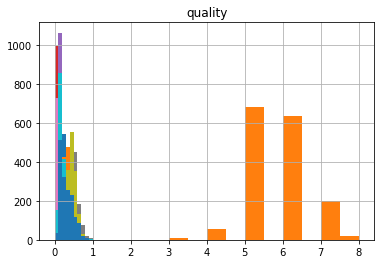

In [6]:
qualityColumnValues = datasetWine['quality']
x = datasetWine.values
min_max_scaler = preprocessing.MinMaxScaler()
x_normalized = min_max_scaler.fit_transform(x)
dataSetNormalized = pd.DataFrame(x_normalized, columns=datasetWine.columns)

#We do not need the quality normalization. It is the label.
dataSetNormalized['quality'] = qualityColumnValues
print(dataSetNormalized.columns)
for feature in dataSetNormalized.columns:
    
    dataSetNormalized[feature].hist()
    plt.title(feature)
    #plt.show()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


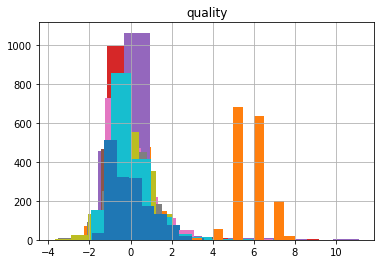

In [7]:
qualityColumnValues = datasetWine['quality']
x = datasetWine.values
standarScaler = preprocessing.StandardScaler()
x_scaled = standarScaler.fit_transform(x)
dataSetScaled = pd.DataFrame(x_scaled, columns=datasetWine.columns)
dataSetScaled['quality'] = qualityColumnValues

print(dataSetScaled.columns)
for feature in dataSetScaled.columns:
    
    dataSetScaled[feature].hist()
    plt.title(feature)
    #plt.show()

# Create train and test sets

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(dataSetNormalized, Y, test_size=0.2, train_size=0.8, stratify=Y, shuffle=True)

In [9]:
print("Training set distribution")
quality_X_train = X_train['quality'].value_counts()

print('Low quality [3-5]: {0:f}%'.format(sum([quality_X_train[i] for i in range(3,6)])/len(X_train)))
print('High quality [6-8]: {0:f}%'.format(sum([quality_X_train[i] for i in range(6,9)])/len(X_train)))
print('Training set size ', len(X_train))
print('Training set rate {0:f}%'.format(len(X_train)/len(dataSetNormalized)))

print('---------------------')
print("Test set distribution")
quality_X_test = X_test['quality'].value_counts()
print(quality_X_test)
print('Low quality [3-5]: {0:f}%'.format(sum([quality_X_test[i] for i in range(3,6)])/len(X_test)))
print('High quality [6-8]: {0:f}%'.format(sum([quality_X_test[i] for i in range(6,9)])/len(X_test)))
print('Test set size: ', len(X_test))
print('Training set rate: {0:f}%'.format(len(X_test)/len(dataSetNormalized)))

#Remove the quality column
X_train.drop('quality',axis='columns', inplace=True)
X_test.drop('quality',axis='columns', inplace=True)


Training set distribution
Low quality [3-5]: 0.465207%
High quality [6-8]: 0.534793%
Training set size  1279
Training set rate 0.799875%
---------------------
Test set distribution
5    134
6    126
7     38
4     11
8      7
3      4
Name: quality, dtype: int64
Low quality [3-5]: 0.465625%
High quality [6-8]: 0.534375%
Test set size:  320
Training set rate: 0.200125%
C:\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Logistic Regression

In [10]:
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, Y_train)
y_pred = logisticRegression.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
confusion_matrix(Y_test,y_pred)

Accuracy Score : 0.775
Precision Score : 0.7894736842105263
Recall Score : 0.7894736842105263
F1 Score : 0.7894736842105263


array([[113,  36],
       [ 36, 135]], dtype=int64)

In [11]:
logisticRegressionGrid = LogisticRegression()
grid_values = {'penalty': ['l2'],'C':[0.001,0.005,0.009,0.01,0.02,0.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(logisticRegressionGrid, 
                param_grid = grid_values,scoring = 'accuracy')

grid_clf_acc.fit(X_train, Y_train)
print(grid_clf_acc.best_params_)
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred_acc)))
confusion_matrix(Y_test,y_pred_acc)

{'C': 5, 'penalty': 'l2'}
Accuracy Score : 0.784375
Precision Score : 0.8035714285714286
Recall Score : 0.7894736842105263
F1 Score : 0.7964601769911505


array([[116,  33],
       [ 36, 135]], dtype=int64)

# Better Feature Engineering

## Data cleaning

In [90]:
datasetFixed = datasetWine.copy()
Y = [int(datasetFixed['quality'][i] >5.5) for i in range(len(datasetFixed))]
datasetFixed['classification'] = Y
datasetFixed.drop('quality', axis = 1, inplace = True)

## Check missing values
All features are OK!

In [91]:
datasetFixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  classification        1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Delete outliers

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

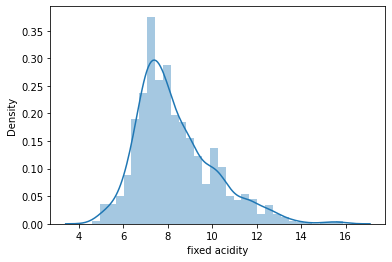

In [92]:
import seaborn as sns
datasetFixed.describe()
sns.distplot(datasetFixed['fixed acidity'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

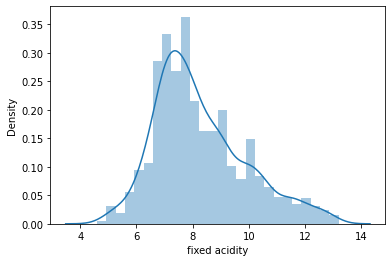

In [93]:
q = datasetFixed['fixed acidity'].quantile(0.99)
datasetFixed = datasetFixed[datasetWine['fixed acidity'] < q]

sns.distplot(datasetFixed['fixed acidity'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

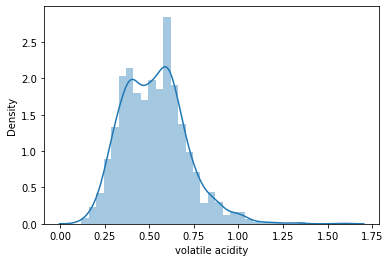

In [94]:
sns.distplot(datasetFixed['volatile acidity'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

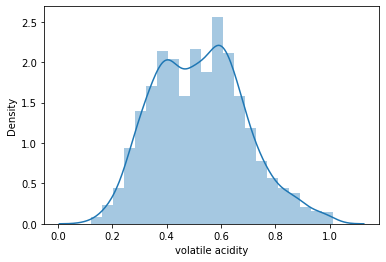

In [95]:
q = datasetFixed['volatile acidity'].quantile(0.99)
datasetFixed = datasetFixed[datasetFixed['volatile acidity'] < q]

sns.distplot(datasetFixed['volatile acidity'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='citric acid', ylabel='Density'>

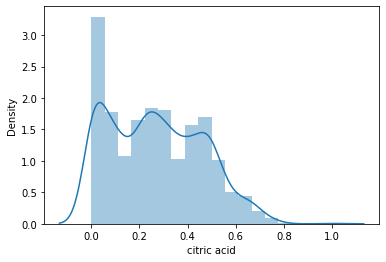

In [96]:
sns.distplot(datasetFixed['citric acid'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='citric acid', ylabel='Density'>

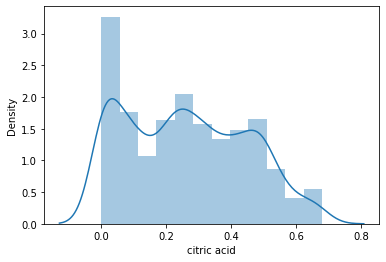

In [97]:
q = datasetFixed['citric acid'].quantile(0.99)
datasetFixed = datasetFixed[datasetFixed['citric acid'] < q]

sns.distplot(datasetFixed['citric acid'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

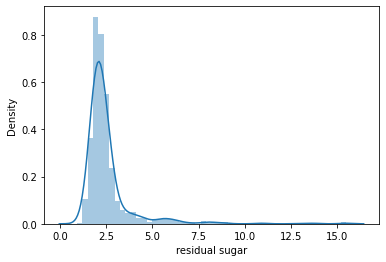

In [98]:
sns.distplot(datasetFixed['residual sugar'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

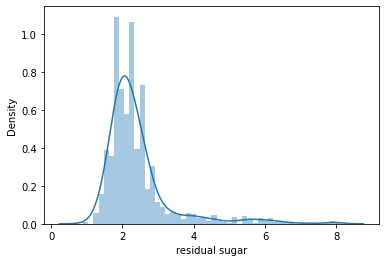

In [99]:
q = datasetFixed['residual sugar'].quantile(0.99)
datasetFixed = datasetFixed[datasetFixed['residual sugar'] < q]

sns.distplot(datasetFixed['residual sugar'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chlorides', ylabel='Density'>

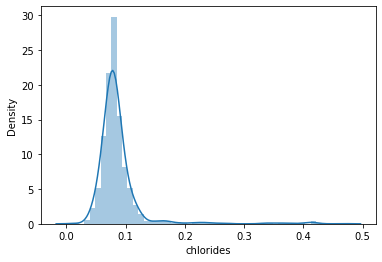

In [100]:
sns.distplot(datasetFixed['chlorides'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chlorides', ylabel='Density'>

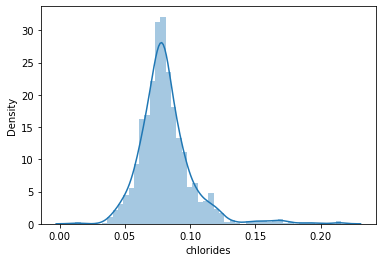

In [101]:
q = datasetFixed['chlorides'].quantile(0.98)
datasetFixed = datasetFixed[datasetFixed['chlorides'] < q]

sns.distplot(datasetFixed['chlorides'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chlorides', ylabel='Density'>

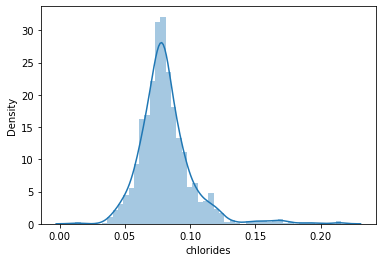

In [102]:
sns.distplot(datasetFixed['chlorides'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chlorides', ylabel='Density'>

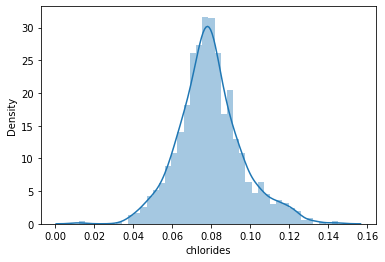

In [103]:
q = datasetFixed['chlorides'].quantile(0.98)
datasetFixed = datasetFixed[datasetFixed['chlorides'] < q]

sns.distplot(datasetFixed['chlorides'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

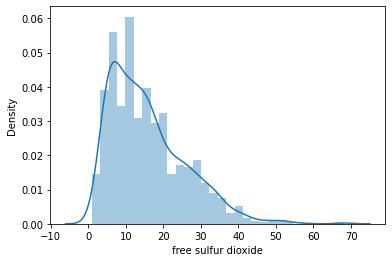

In [104]:
sns.distplot(datasetFixed['free sulfur dioxide'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

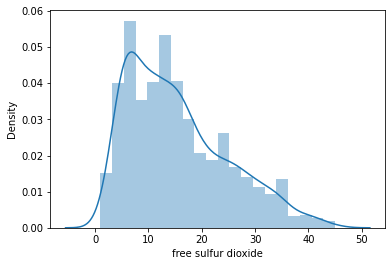

In [105]:
q = datasetFixed['free sulfur dioxide'].quantile(0.99)
datasetFixed = datasetFixed[datasetFixed['free sulfur dioxide'] < q]

sns.distplot(datasetFixed['free sulfur dioxide'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

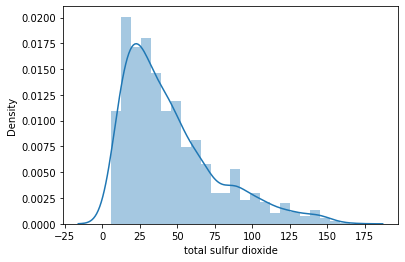

In [106]:
sns.distplot(datasetFixed['total sulfur dioxide'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

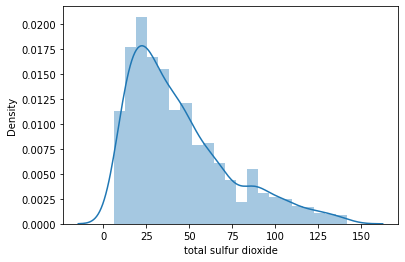

In [107]:
q = datasetFixed['total sulfur dioxide'].quantile(0.99)
datasetFixed = datasetFixed[datasetFixed['total sulfur dioxide'] < q]

sns.distplot(datasetFixed['total sulfur dioxide'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='density', ylabel='Density'>

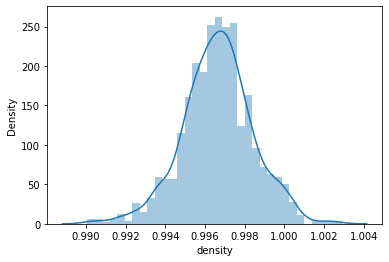

In [108]:
sns.distplot(datasetFixed['density'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='density', ylabel='Density'>

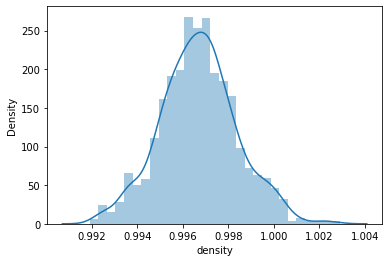

In [109]:
q = datasetFixed['density'].quantile(0.01)
datasetFixed = datasetFixed[datasetFixed['density'] > q]

sns.distplot(datasetFixed['density'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pH', ylabel='Density'>

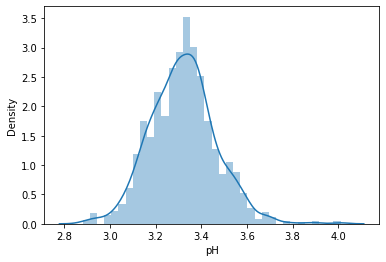

In [110]:
sns.distplot(datasetFixed['pH'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pH', ylabel='Density'>

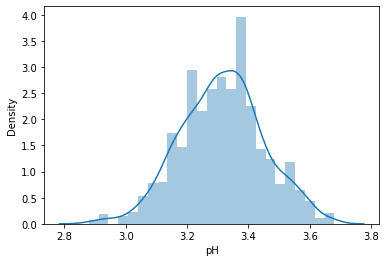

In [111]:
q = datasetFixed['pH'].quantile(0.99)
datasetFixed = datasetFixed[datasetFixed['pH'] < q]

sns.distplot(datasetFixed['pH'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sulphates', ylabel='Density'>

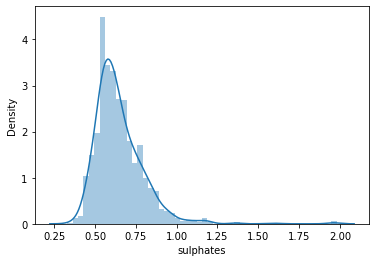

In [112]:
sns.distplot(datasetFixed['sulphates'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sulphates', ylabel='Density'>

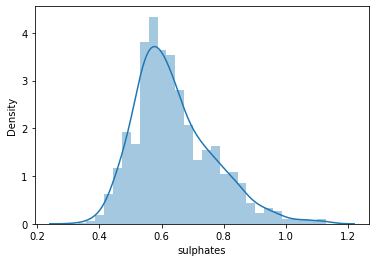

In [113]:
q = datasetFixed['sulphates'].quantile(0.99)
datasetFixed = datasetFixed[datasetFixed['sulphates'] < q]

sns.distplot(datasetFixed['sulphates'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

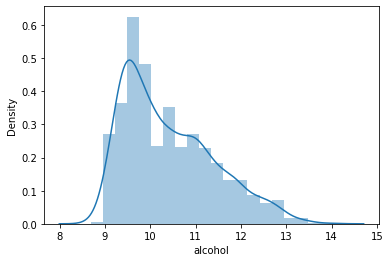

In [114]:
sns.distplot(datasetFixed['alcohol'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

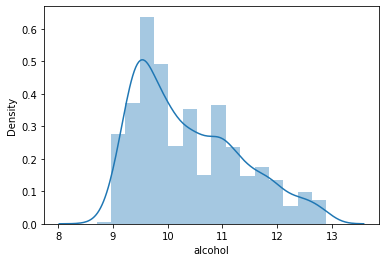

In [115]:
q = datasetFixed['alcohol'].quantile(0.99)
datasetFixed = datasetFixed[datasetFixed['alcohol'] < q]

sns.distplot(datasetFixed['alcohol'])

In [116]:
datasetWine.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [117]:
datasetFixed.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,classification
count,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000
mean,8.281368,0.523788,0.259345,2.410662,0.079747,15.257642,43.680495,0.996729,3.316259,0.638261,10.378663,0.534934
std,1.580577,0.166523,0.184129,0.943192,0.015785,9.250295,28.728287,0.001667,0.134239,0.126101,0.965813,0.498960
min,5.100000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991910,2.880000,0.330000,8.700000,0.000000
25%,7.100000,0.391250,0.090000,1.900000,0.070000,7.250000,22.000000,0.995620,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.245000,2.200000,0.079000,13.000000,37.000000,0.996700,3.320000,0.615000,10.100000,1.000000
75%,9.100000,0.638750,0.410000,2.600000,0.088000,21.000000,58.000000,0.997740,3.400000,0.710000,11.000000,1.000000
max,13.200000,1.010000,0.680000,8.100000,0.145000,45.000000,142.000000,1.002890,3.680000,1.130000,12.900000,1.000000


## Assumptions

In [118]:
datasetFixed.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'classification'], dtype=object)

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [120]:
variables = datasetFixed[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',]]
x = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features'] = x.columns
vif

,VIF,features
0,2.104543e+06,const
1,7.414233e+00,fixed acidity
2,1.962737e+00,volatile acidity
3,3.128563e+00,citric acid
4,1.605555e+00,residual sugar
5,1.240552e+00,chlorides
6,1.985187e+00,free sulfur dioxide
7,2.298757e+00,total sulfur dioxide
8,6.102337e+00,density
9,3.046392e+00,pH


## Standard Scaler

In [121]:
#Declaring independent variable i.e x
#Declaring Target variable i.e y
x = datasetFixed.drop('classification', axis =1 ) #Get a copy of dataset without that column
y = datasetFixed['classification']
scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, stratify=y, shuffle=True)



logisticRegression = LogisticRegression(max_iter=500)
logisticRegression.fit(X_train, Y_train)
y_pred = logisticRegression.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
confusion_matrix(Y_test,y_pred)

Accuracy Score : 0.7745454545454545
Precision Score : 0.7972027972027972
Recall Score : 0.7755102040816326
F1 Score : 0.7862068965517242


array([[ 99,  29],
       [ 33, 114]], dtype=int64)

In [127]:
print("Training set distribution")
classification_X_train = Y_train.value_counts()

print('Low quality [3-5]: {0:f}%'.format(sum([classification_X_train[i] for i in range(0,1)])/len(X_train)))
print('High quality [6-8]: {0:f}%'.format(sum([classification_X_train[i] for i in range(1,2)])/len(X_train)))
print('Training set size ', len(Y_train))
print('Training set rate {0:f}%'.format(len(X_train)/len(x)))

print('---------------------')
print("Test set distribution")
classification_X_test = Y_test.value_counts()
print('Low quality [3-5]: {0:f}%'.format(sum([classification_X_test[i] for i in range(0,1)])/len(X_test)))
print('High quality [6-8]: {0:f}%'.format(sum([classification_X_test[i] for i in range(1,2)])/len(X_test)))
print('Test set size: ', len(Y_test))
print('Training set rate: {0:f}%'.format(len(X_test)/len(x)))

Training set distribution
Low quality [3-5]: 0.464968%
High quality [6-8]: 0.535032%
Training set size  1099
Training set rate 0.799854%
---------------------
Test set distribution
Low quality [3-5]: 0.465455%
High quality [6-8]: 0.534545%
Test set size:  275
Training set rate: 0.200146%


In [128]:
logisticRegressionGrid = LogisticRegression(max_iter=1500)
grid_values = {'penalty': ['l2'],'C':[0.001,0.005,0.009,0.01,0.02,0.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(logisticRegressionGrid, 
                param_grid = grid_values,scoring = 'accuracy')

grid_clf_acc.fit(X_train, Y_train)
print(grid_clf_acc.best_params_)
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred_acc)))
confusion_matrix(Y_test,y_pred_acc)

{'C': 1, 'penalty': 'l2'}
Accuracy Score : 0.7745454545454545
Precision Score : 0.7972027972027972
Recall Score : 0.7755102040816326
F1 Score : 0.7862068965517242


array([[ 99,  29],
       [ 33, 114]], dtype=int64)